In [1]:
import importlib
import sys
from urllib.request import urlretrieve


# python libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from sympy import Matrix

import pydrake.all

# pydrake imports
from pydrake.common.containers import namedview
from pydrake.systems.scalar_conversion import TemplateSystem
from pydrake.all import (Variable, SymbolicVectorSystem, VectorSystem, DiagramBuilder,
                         LogOutput, Simulator, ConstantVectorSource,
                         MathematicalProgram, Solve, SnoptSolver, PiecewisePolynomial, eq, cos, sin, 
                         DirectTranscription, DirectCollocation)
from pydrake.systems.framework import (BasicVector, BasicVector_, LeafSystem_,
                                       LeafSystem)
import pydrake.symbolic as sym

from lyapunov_control import *
from trajopt_control import *

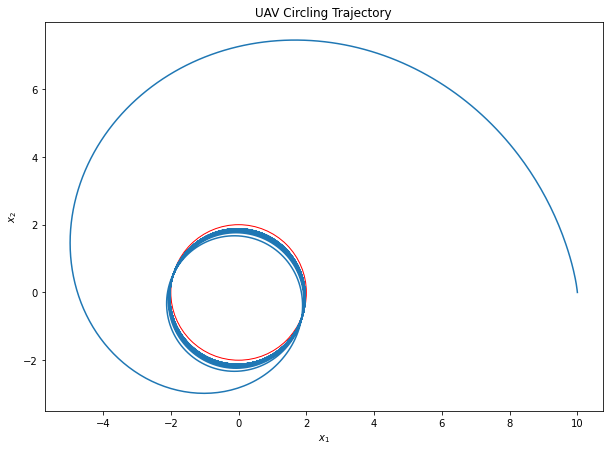

In [2]:
x0 = np.array([10, 0, np.pi/2+.1])
xf = np.array([0, 0, 0])


simulator, dat = lyapunov_simulation(x0, xf, )

draw_simulation(dat, xf, 2)

(401, 3)


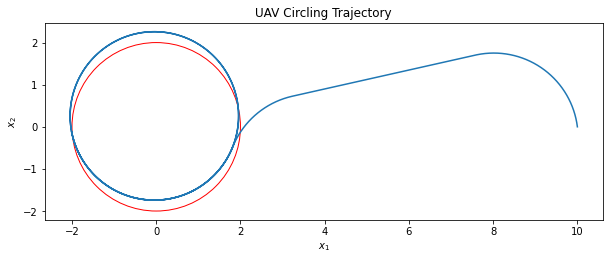

In [3]:
x_opt, u_opt = trajopt_simulation(x0, xf)
draw_simulation(x_opt, xf, 2)


http://michalcap.net/wp-content/papercite-data/pdf/paden_2016.pdf

(401,)
0


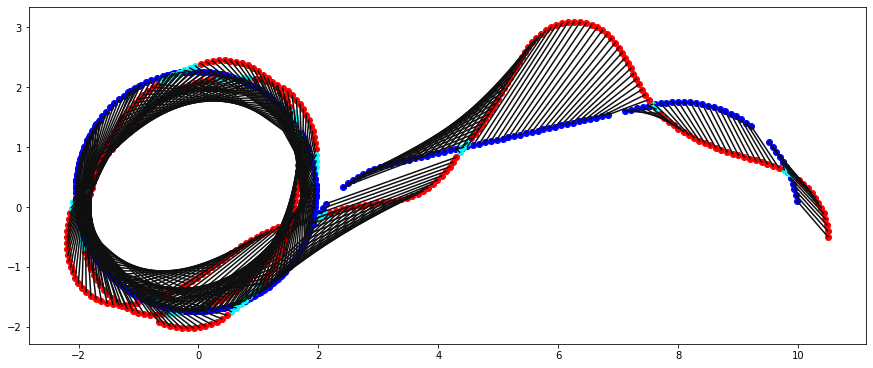

In [4]:
dt = 0.1
k = 1
x0 = np.array([10.5, -0.5, np.pi/2.])
n_points = np.shape(x_opt)[1]
x_traj = np.zeros(np.shape(x_opt))
plt.figure(figsize=(15, 15))

x0_long = np.repeat(x0.reshape(3, 1), n_points, axis=1)
differences = np.linalg.norm(x_opt[:2,:] - x0_long[:2,:], axis=0)
print(np.shape(differences))
idx_min_diff = np.argmin(np.linalg.norm(x_opt[:2,:] - x0_long[:2,:], axis=0))
print(idx_min_diff)

for i in range(n_points-1):
    x0_long = np.repeat(x0.reshape(3, 1), n_points, axis=1)
    differences = np.linalg.norm(x_opt[:2,:] - x0_long[:2,:], axis=0)
    idx_min_diff = np.argmin(differences)
    almost = False
    close = False
#     if differences[idx_min_diff] < 0.1:
#         close = True
#         xf = x_opt[:,min(idx_min_diff+1, n_points-1)]
#         uf = u_opt[min(idx_min_diff, n_points-2)]
#     else:
    close = False
    xf = x_opt[:,i+1]
    uf = u_opt[i]
    
        
    plt.plot([x0[0], xf[0]], [x0[1], xf[1]], c='#0f0f0f')
    plt.scatter(xf[0], xf[1], c='b')
    
    if almost:
        plt.scatter(x0[0], x0[1], c='magenta')
    elif close:
        plt.scatter(x0[0], x0[1], c='cyan')
    else:
        plt.scatter(x0[0], x0[1], c='r')
        
    simulator, dat = lyapunov_simulation(x0, xf, uf, to_point=True)
    x0 = dat[:,-1]
    x_traj[:,i] = dat[:,-1]

plt.gca().set_aspect('equal')

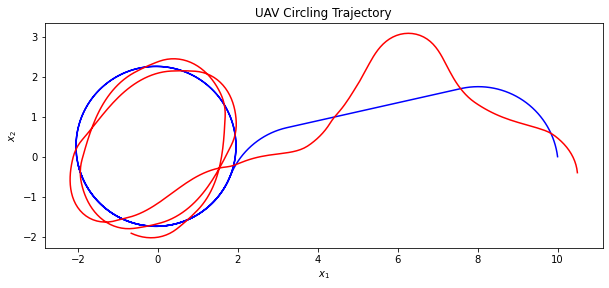

In [7]:
draw_comparison(x_opt[:,:-1], x_traj[:,:-2])

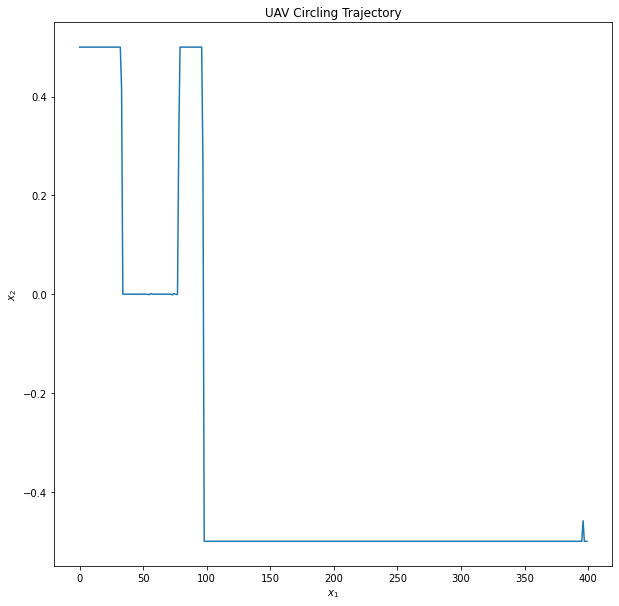

In [6]:
plt.figure(figsize=(10, 10))
fig  = plt.gcf()
ax = plt.gca()
t = np.linspace(0, 400, int(400/0.1))

plt.plot(u_opt)
# circle1 = plt.Circle((xf[0], xf[2]), r, color='r', fill=False)

# ax.add_patch(circle1)

# misc plot settings
# plt.gca().set_aspect('equal')
# plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('UAV Circling Trajectory');